# The 1st Assignment - Digital Image Processing

> Geohasby Ammar Kautsar

> 19/442475/PA/19224







## Image Histogram

In [1]:
# Import library
import cv2
import numpy as np
import matplotlib.pyplot as plt

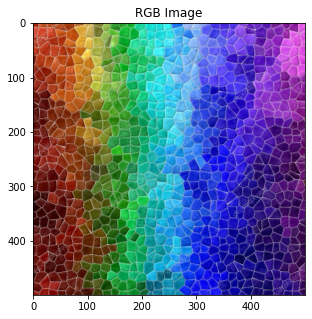

In [2]:
# Create a new figure and set width, height in inches
plt.figure(figsize=(13,5))

# Import, resize, and show Image
path = "fullcolor.jpg"
img = cv2.imread(path)
img = cv2.resize(img, (500, 500))
plt.title("RGB Image")
plt.imshow(img)

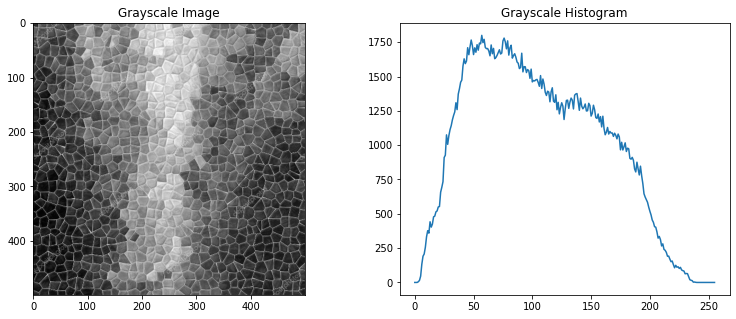

In [3]:
# Create a new figure and set width, height in inches
plt.figure(figsize=(13,5))

# Convert to Grayscale
gs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(121)
plt.title("Grayscale Image")
plt.imshow(gs, cmap='gray')

# Grayscale Histogram
hist = cv2.calcHist([gs], [0], None, [256], [0, 256])
plt.subplot(122)
plt.title("Grayscale Histogram")
plt.plot(hist)
plt.show()

## Non Uniform Quantization

### Declare Array, Function, and Procedure

In [4]:
# Convert array of histogram to 1D array
hist = hist.ravel()

# Function to get average color intensity at a level
def find_mean(l, r) :
  n = 0
  sum = 0

  for i in range(l, r) :
    sum += (i*hist[i])
    n += hist[i]
  
  if n == 0 :
    return -1
  else :
    return sum / n

# Procedure to show Image and Histogram
def show_image_and_histogram(res) :
  plt.figure(figsize=(13,5))
  plt.subplot(121)
  plt.title("Image Result")
  plt.imshow(res, cmap='gray')
  res_hist = cv2.calcHist([res], [0], None, [256], [0, 255])
  plt.subplot(122)
  plt.title("Histogram")
  plt.plot(res_hist)
  plt.show()

### Using Median / Quartile

In [5]:
# Non Uniform Quantization Algorithm using Median / Quartile to split into several levels
def non_uniform_quantization_using_median(k) :
  gs_sorted = gs.copy()
  gs_sorted = gs_sorted.ravel()
  gs_sorted.sort()

  # Determine quartile or color intensity as bounders between levels
  q = [0]                               # lowerbound = 0 (inclusive)
  for i in range(1, k) :
    q.append(gs_sorted[500*500*i//k])   # Image size = 500 * 500 pixels
  q.append(256)                         # upperbound  = 256 (exclusive)
  
  # Determine the average color intensity for each level
  mean = []
  for i in range(k) :
    mean.append(int(find_mean(q[i], q[i+1])))

  # Make a copy from grayscale image (later be used for quantization)
  res = gs.copy()

  # Do quantization (change color intensity according to its level)
  for i in range(len(res)) :
    for j in range(len(res[i])) :
      for l in range(1, k+1) :
        if res[i][j] < q[l] :
          res[i][j] = mean[l-1]
          break

  # Show the result
  show_image_and_histogram(res)

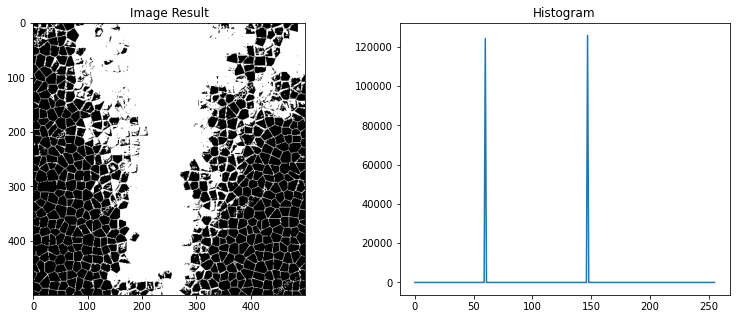

In [6]:
# 2 levels
non_uniform_quantization_using_median(2)

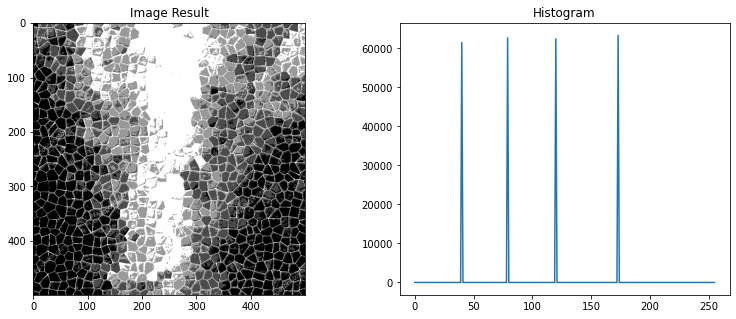

In [7]:
# 4 levels
non_uniform_quantization_using_median(4)

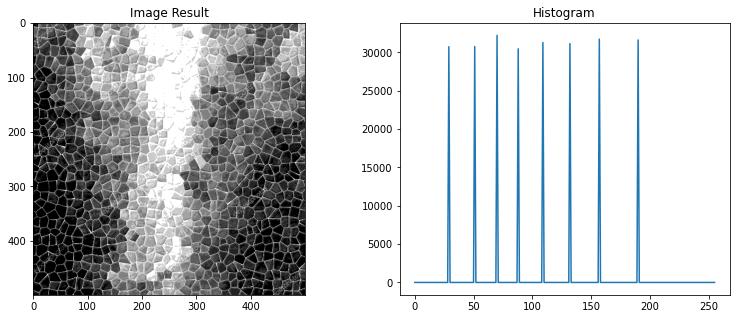

In [8]:
# 8 levels
non_uniform_quantization_using_median(8)

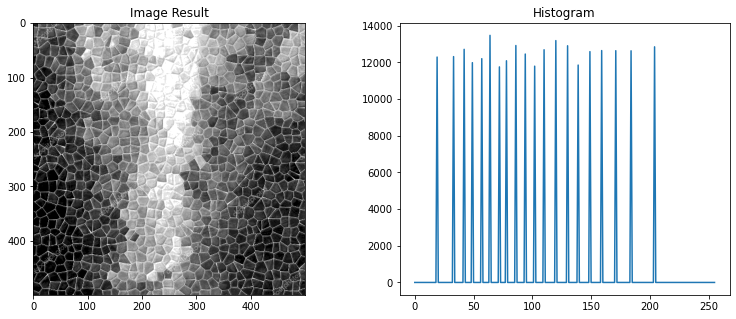

In [9]:
# 20 levels
non_uniform_quantization_using_median(20)

### Using Standard Deviation

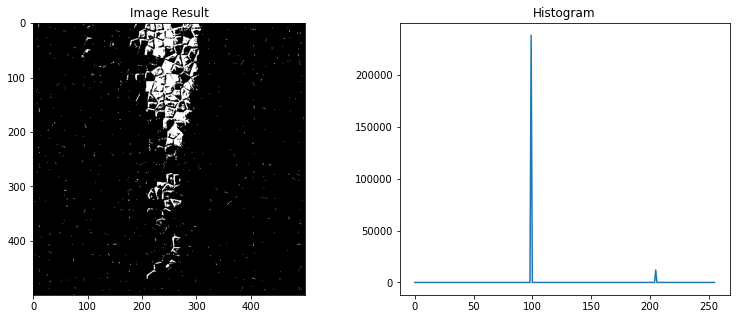

In [10]:
# Non Uniform Quantization Algorithm using standard deviation to split into 2 levels
def non_uniform_quantization_using_std() :
  min_std = -1    # minimum standard deviation
  min_i = -1      # index of minimum standard deviation

  # Determine the bounders between 2 levels
  for i in range(1, 256) :
    x = hist[:i].std()
    y = hist[i:].std()

    # Select bounders that give the minimum value of the biggest standard deviation between 2 levels
    if (min_std == -1) or (min_std > max(x,y)) :
      min_std = max(x,y)
      min_i = i

  # Determine average color intensity for each level
  a = round(find_mean(0, min_i))
  b = round(find_mean(min_i, 256))

  # Make a copy from grayscale image (later be used for quantization)
  res = gs.copy()

  # Do quantization (change color intensity according to its level)
  for i in range(len(res)) :
    for j in range(len(res[i])) :
      res[i][j] = a if res[i][j] < min_i else b

  # Show the result
  show_image_and_histogram(res)

# Call the function to do non uniform quantization for 2 levels
non_uniform_quantization_using_std()

## Conclusion



* Histogram table is used to display the frequency for each color intensity.

* Non Uniform Quantization for level division can be done with several ways, can use the k_means, median/quartile, standard deviation, etc.

* In this assignment, I tried to use the median/quartile and standard deviation for level division.

* By using Non Uniform Quantization (median/quartile) on my sample image, the result obtained is better than using Non Uniform Quantization (standard deviation).

* Of course the quality of result obtained will be different depend on the sample image itself, maybe in some cases it will get the better result if using Non Uniform Quantization (standard deviation).








